In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Test set Image Processing

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

Loading Model

In [3]:
cnn = tf.keras.models.load_model('trained_Crop_disease_model.keras')

Visualising and Performing Prediction on Single image

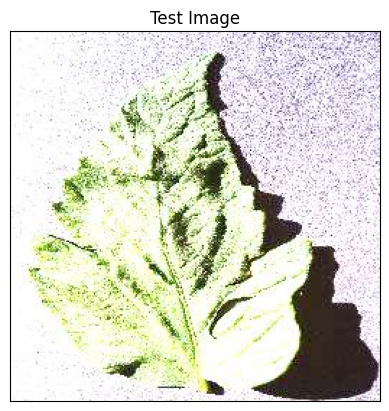

In [4]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoHealthy4.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()



Testing Model

In [5]:

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [6]:
print(predictions)

[[2.1305882e-11 3.3193667e-12 8.2606155e-10 1.2160271e-09 9.3936407e-11
  1.2950200e-08 3.6144319e-13 9.0901184e-12 4.4076220e-13 7.5951170e-13
  2.5311242e-12 7.8526620e-15 4.0986906e-12 2.0121727e-16 1.4146682e-13
  1.6283632e-13 2.2989909e-12 1.4655549e-10 7.2448796e-13 1.7124305e-10
  1.7044386e-12 1.9361899e-14 2.9225200e-10 1.3286955e-11 1.4157270e-12
  1.8994515e-09 2.8935486e-11 1.1353922e-12 1.0704957e-11 7.8558653e-12
  5.0622315e-08 3.2069333e-10 4.5776347e-10 3.2797114e-09 1.0736744e-05
  5.8159892e-12 1.7407091e-09 9.9998915e-01]]


In [7]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

37


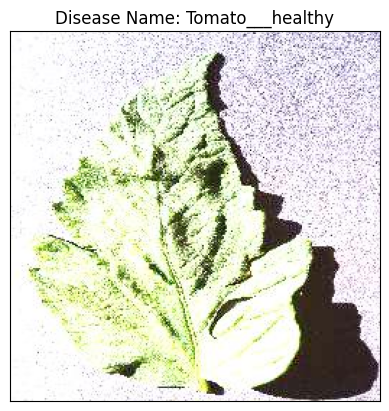

In [8]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
import cv2
print(cv2.__version__)

4.12.0


In [10]:
import seaborn as sns
print(sns.__version__)

0.13.2


In [11]:
import matplotlib
print(matplotlib.__version__)

3.10.0


In [12]:
import keras
print(keras.__version__)

3.11.3
